### import data

In [110]:
import pandas as pd

In [111]:
cd=pd.read_csv('Company_Data.csv')

In [112]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### inital analysis

In [113]:
cd.shape

(400, 11)

In [114]:
cd.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [115]:
cd.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [116]:
cd.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## data preparation and transformation

In [117]:
cd['Sales']=pd.cut(x=cd['Sales'],bins=[0,7.49,16.27],labels=['Bad','Good'])


In [118]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Good,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Good,111,48,16,260,83,Good,65,10,Yes,Yes
2,Good,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Bad,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Bad,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,Good,138,108,17,203,128,Good,33,14,Yes,Yes
396,Bad,139,23,3,37,120,Medium,55,11,No,Yes
397,Bad,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Bad,100,79,7,284,95,Bad,50,12,Yes,Yes


In [119]:
cd.dtypes

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc        object
Age               int64
Education         int64
Urban            object
US               object
dtype: object

In [120]:
cd['Sales'] =cd['Sales'].astype(str)

In [121]:
cd.dtypes

Sales          object
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cd['Sales']=le.fit_transform(cd['Sales'])
cd['ShelveLoc']=le.fit_transform(cd['ShelveLoc'])
cd['US']=le.fit_transform(cd['US'])
cd['Urban']=le.fit_transform(cd['Urban'])

In [123]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [124]:
cd.dtypes

Sales          int32
CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
dtype: object

## model building

In [125]:
x=cd.drop(columns='Sales',axis=0 )
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [126]:
y=cd[['Sales']]
y

,Sales
0,1
1,1
2,1
3,0
4,0
...,...
395,1
396,0
397,0
398,0


In [127]:
#### Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [128]:
#Training data
x_train.shape,y_train.shape

((320, 10), (320, 1))

In [129]:
#Test data
x_test.shape,y_test.shape

((80, 10), (80, 1))

## Model Training

In [130]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

### model testing

### for train data

In [131]:
y_train_pred=dt_model.predict(x_train)
y_train_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

### for test data

In [132]:
y_test_pred=dt_model.predict(x_test)
y_test_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

###  Model Evaluation

In [133]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

#### Training data

In [134]:
accuracy_score(y_train,y_train_pred)

1.0

In [135]:
confusion_matrix(y_train,y_train_pred,labels=[1,0])


array([[159,   0],
       [  0, 160]], dtype=int64)

In [136]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00         1

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



#### Test data

In [137]:
accuracy_score(y_test,y_test_pred)

0.6875

In [138]:
confusion_matrix(y_test,y_test_pred,labels=[1,0])

array([[25, 15],
       [10, 30]], dtype=int64)

In [139]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        40
           1       0.71      0.62      0.67        40

    accuracy                           0.69        80
   macro avg       0.69      0.69      0.69        80
weighted avg       0.69      0.69      0.69        80



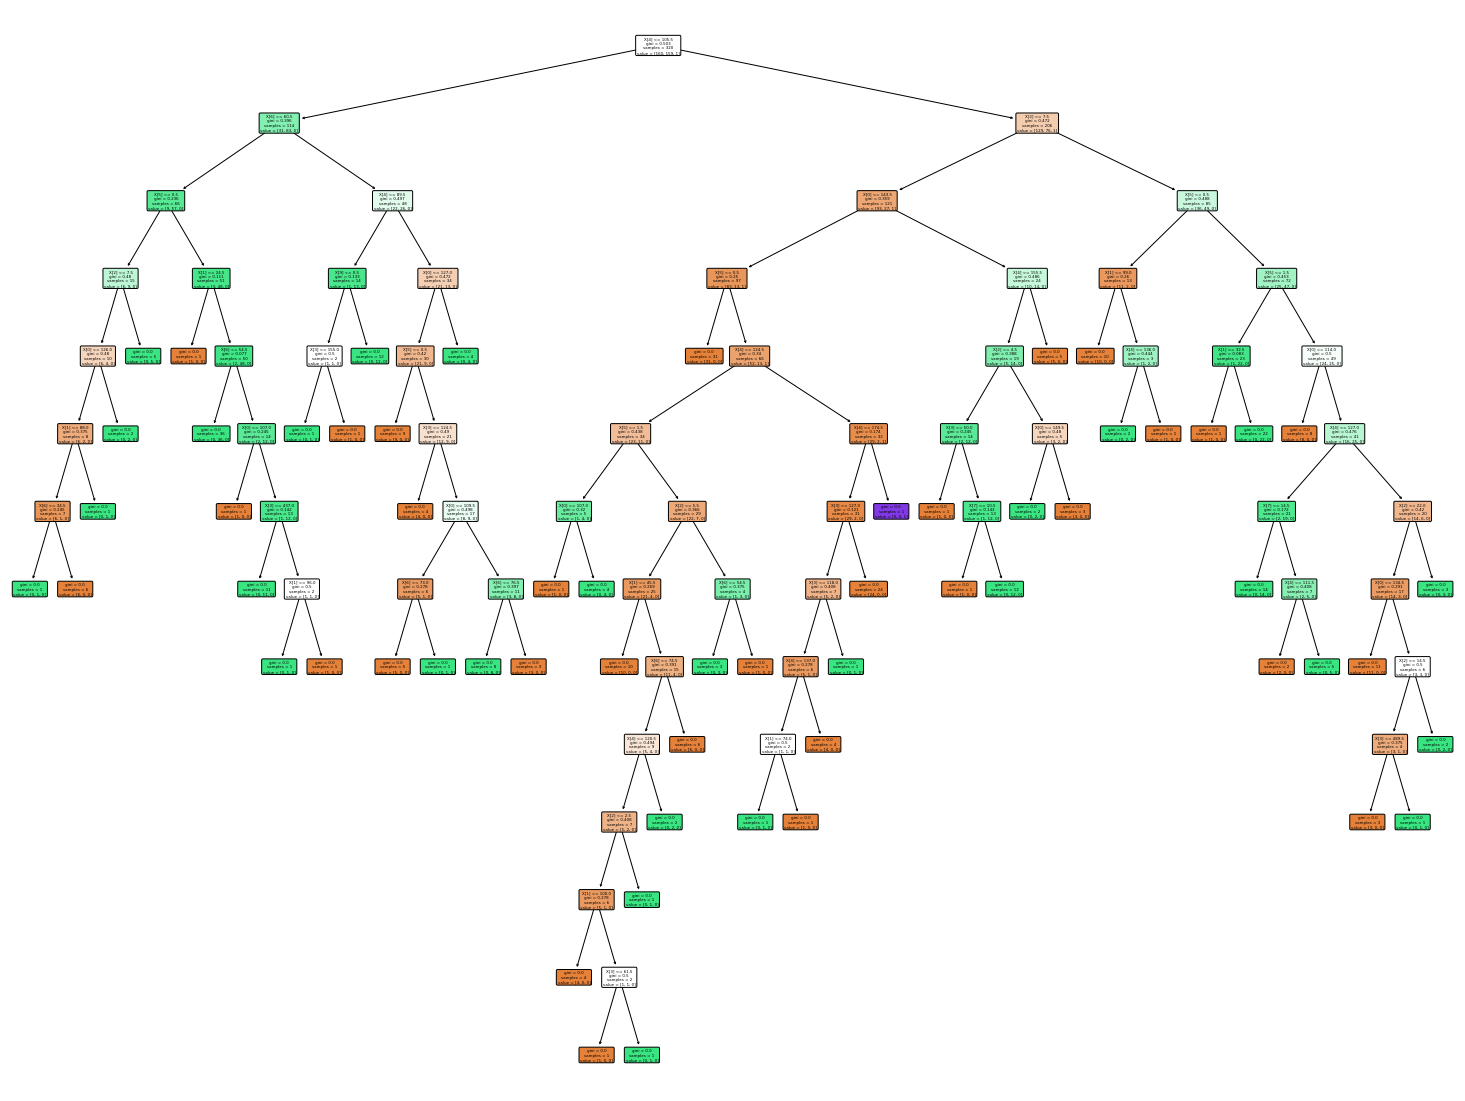

In [140]:
#prepare a plot figure with set size
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(26,20))
#plot the dicision tree
plot_tree(dt_model,rounded=True,filled=True)#display the tree plot figure
plt.show()

### here we see that accuracy score of test data is 68%where as accuracy of train data is 100%
hence 100-68=32% difference so it called as overfitting problem we can try to overcome that by pruning the tree i.e cutting the tree

### by changing or reducing the depth we pruine the tree

## Model Training

In [141]:
from sklearn.tree import DecisionTreeClassifier
dt_model1=DecisionTreeClassifier(criterion='gini',max_depth=5)
dt_model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

### model testing

### for train data

In [142]:
y_train_pred=dt_model1.predict(x_train)
y_train_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

### for test data

In [143]:
y_test_pred=dt_model1.predict(x_test)
y_test_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

###  Model Evaluation

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

#### Training data

In [145]:
accuracy_score(y_train,y_train_pred)

0.85625

In [146]:
confusion_matrix(y_test,y_test_pred,labels=[1,0])


array([[20, 20],
       [11, 29]], dtype=int64)

In [147]:
import warnings 
warnings.filterwarnings('ignore')

In [148]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       160
           1       0.87      0.84      0.86       159
           2       0.00      0.00      0.00         1

    accuracy                           0.86       320
   macro avg       0.57      0.57      0.57       320
weighted avg       0.85      0.86      0.85       320



#### Test data

In [149]:
accuracy_score(y_test,y_test_pred)

0.6125

In [150]:
confusion_matrix(y_test,y_test_pred)

array([[29, 11],
       [20, 20]], dtype=int64)

In [151]:
precision_score(y_test,y_test_pred)

0.6451612903225806

In [152]:
recall_score(y_test,y_test_pred)

0.5

In [153]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65        40
           1       0.65      0.50      0.56        40

    accuracy                           0.61        80
   macro avg       0.62      0.61      0.61        80
weighted avg       0.62      0.61      0.61        80



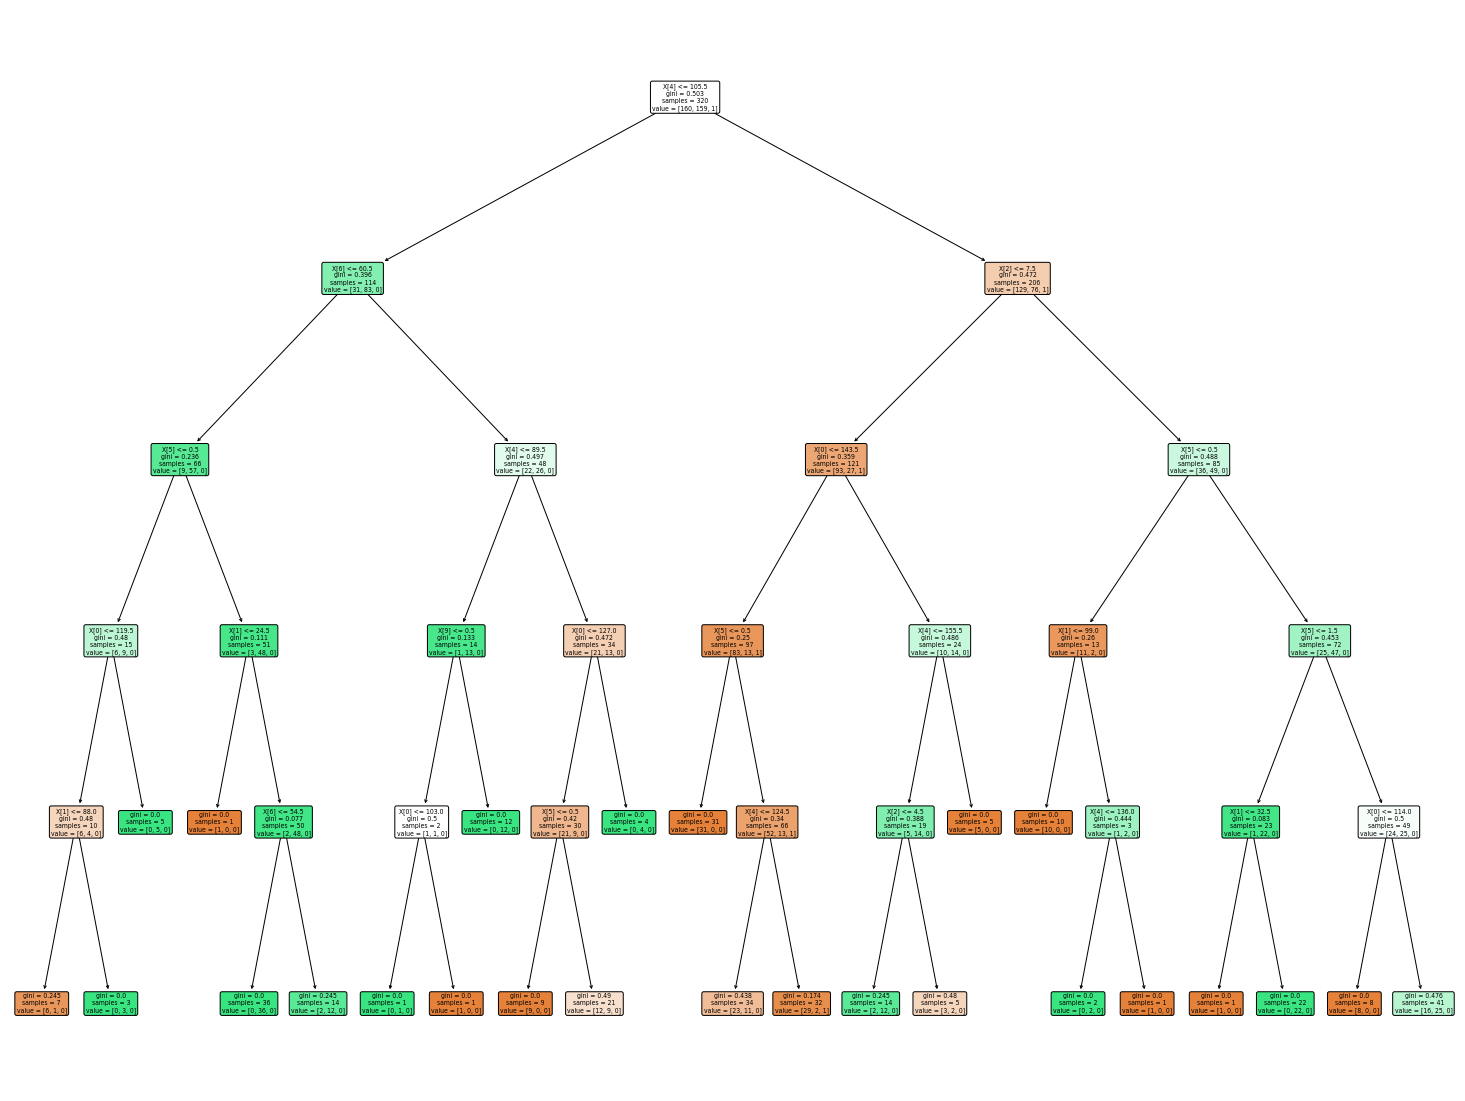

In [154]:
#prepare a plot figure with set size
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(26,20))
#plot the dicision tree
plot_tree(dt_model1,rounded=True,filled=True)#display the tree plot figure
plt.show()

### test data accuracy is 61% and train data is 85% shomewhat reduce but still has a huge overfitting

## grid search cv

In [155]:
# grid search cv
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dt_model1,param_grid={'max_depth':[6,7,8,9,10,12,24,14,15,3,4],'criterion':['gini','entropy']},cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10, 12, 24, 14, 15, 3, 4]})

In [156]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [157]:
grid_search.best_score_

0.725

## so we use ourgrid search cv given max_depth and again build the algoirthm

## Model Training

In [158]:
from sklearn.tree import DecisionTreeClassifier
dt_model1=DecisionTreeClassifier(criterion='gini',max_depth=8)
dt_model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

### model testing

### for train data

In [159]:
y_train_pred=dt_model1.predict(x_train)
y_train_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,

### for test data

In [160]:
y_test_pred=dt_model1.predict(x_test)
y_test_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

###  Model Evaluation

In [161]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

#### Training data

In [162]:
accuracy_score(y_train,y_train_pred)

0.975

In [163]:
confusion_matrix(y_test,y_test_pred,labels=[1,0])


array([[21, 19],
       [ 6, 34]], dtype=int64)

In [164]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       160
           1       1.00      0.95      0.97       159
           2       1.00      1.00      1.00         1

    accuracy                           0.97       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.97      0.97       320



#### Test data

In [165]:
accuracy_score(y_test,y_test_pred)

0.6875

In [166]:
confusion_matrix(y_test,y_test_pred)

array([[34,  6],
       [19, 21]], dtype=int64)

In [167]:
precision_score(y_test,y_test_pred)

0.7777777777777778

In [168]:
recall_score(y_test,y_test_pred)

0.525

In [169]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73        40
           1       0.78      0.53      0.63        40

    accuracy                           0.69        80
   macro avg       0.71      0.69      0.68        80
weighted avg       0.71      0.69      0.68        80



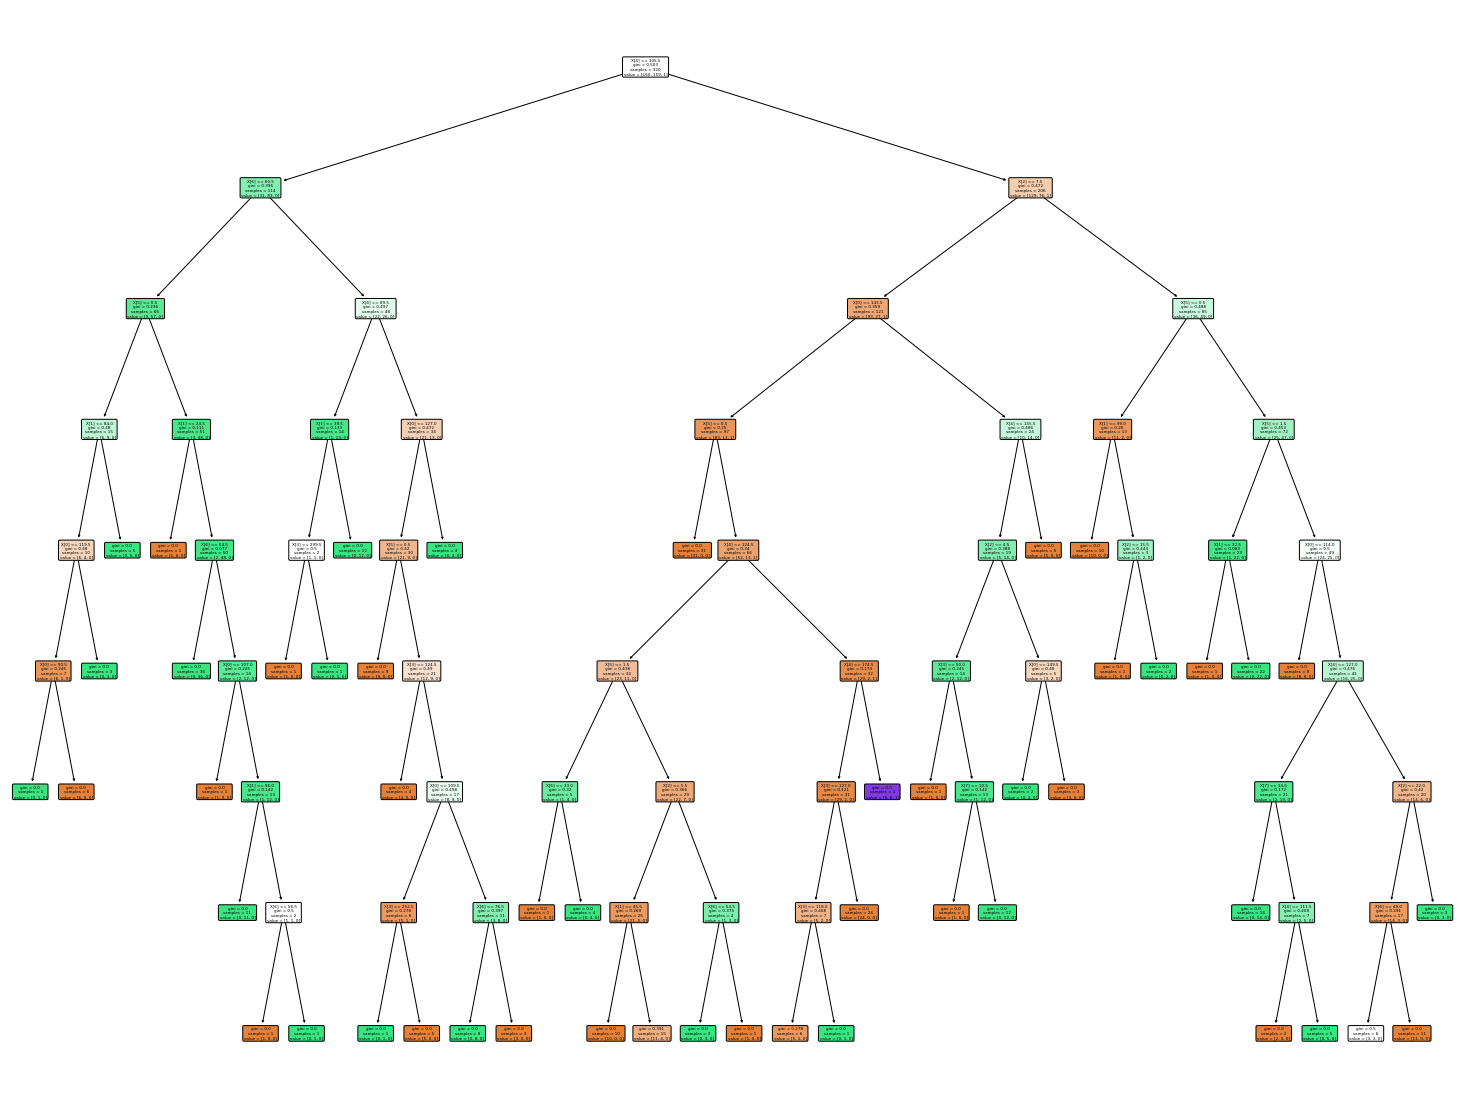

In [170]:
#prepare a plot figure with set size
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(26,20))
#plot the dicision tree
plot_tree(dt_model1,rounded=True,filled=True)#display the tree plot figure
plt.show()

### now we use another validation techique k fold cross  val score validation

In [171]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator = dt_model1,X=x_train,y=y_train,cv=5)
print('5 Fold CV Scores : ',cv_scores)
print('Mean Accuracy    : ',round(cv_scores.mean(),4))
print('STD Deviation    : ',round(cv_scores.std(),4))

5 Fold CV Scores :  [0.734375 0.765625 0.71875  0.640625 0.578125]
Mean Accuracy    :  0.6875
STD Deviation    :  0.0685


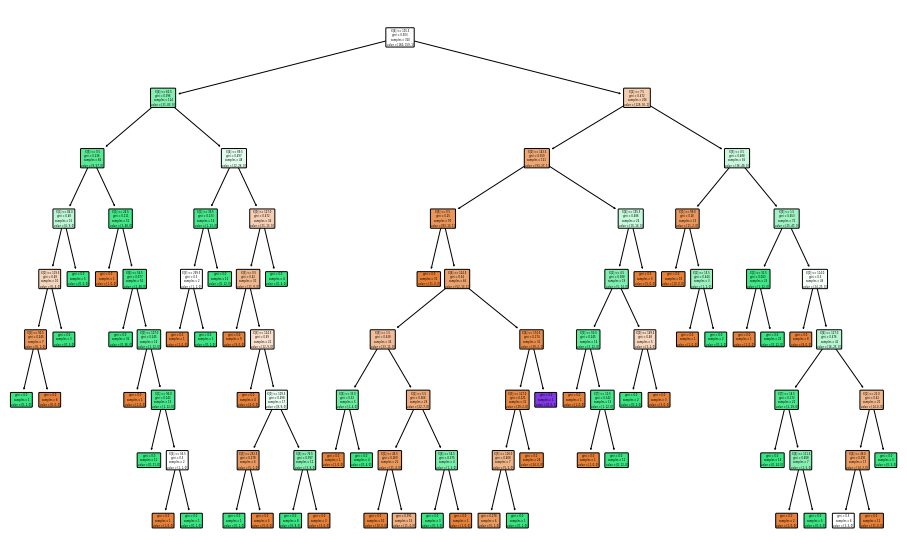

In [172]:
# Prepare a plot figure with set size.
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (16,10))

# Plot the decision tree.
plot_tree(dt_model1,rounded = True,filled = True)# Display the tree plot figure.
plt.show()

### model testing

### for train data

In [173]:
y_train_pred=dt_model1.predict(x_train)
y_train_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,

### for test data

In [174]:
y_test_pred=dt_model1.predict(x_test)
y_test_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

###  Model Evaluation

In [175]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

#### Training data

In [176]:
accuracy_score(y_train,y_train_pred)

0.975

In [177]:
confusion_matrix(y_test,y_test_pred,labels=[1,0])


array([[21, 19],
       [ 6, 34]], dtype=int64)

In [178]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       160
           1       1.00      0.95      0.97       159
           2       1.00      1.00      1.00         1

    accuracy                           0.97       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.97      0.97       320



#### Test data

In [179]:
accuracy_score(y_test,y_test_pred)

0.6875

In [180]:
confusion_matrix(y_test,y_test_pred)

array([[34,  6],
       [19, 21]], dtype=int64)

In [181]:
precision_score(y_test,y_test_pred)

0.7777777777777778

In [182]:
recall_score(y_test,y_test_pred)

0.525

In [183]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73        40
           1       0.78      0.53      0.63        40

    accuracy                           0.69        80
   macro avg       0.71      0.69      0.68        80
weighted avg       0.71      0.69      0.68        80



## handling data imblance

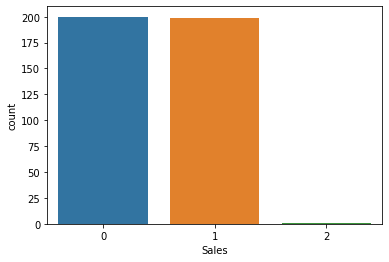

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(cd['Sales'])
plt.show()

In [185]:
cd['Sales'].value_counts()

0    200
1    199
2      1
Name: Sales, dtype: int64

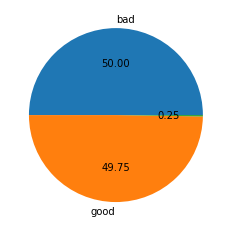

In [186]:
plt.pie(x=cd['Sales'].value_counts(),labels=['bad','good',''],autopct='%.2f')
plt.show()

## Model Training

In [187]:
from sklearn.tree import DecisionTreeClassifier
dt_model1=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight={0:1,1:1})
dt_model1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 1}, max_depth=3)

### model testing

### for train data

In [188]:
y_train_pred=dt_model1.predict(x_train)
y_train_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,

### for test data

In [189]:
y_test_pred=dt_model1.predict(x_test)
y_test_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

###  Model Evaluation

In [190]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

#### Training data

In [191]:
accuracy_score(y_train,y_train_pred)

0.76875

In [192]:
confusion_matrix(y_test,y_test_pred,labels=[1,0])


array([[23, 17],
       [14, 26]], dtype=int64)

In [193]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       160
           1       0.74      0.82      0.78       159
           2       0.00      0.00      0.00         1

    accuracy                           0.77       320
   macro avg       0.51      0.51      0.51       320
weighted avg       0.77      0.77      0.77       320



#### Test data

In [194]:
accuracy_score(y_test,y_test_pred)

0.6125

In [195]:
confusion_matrix(y_test,y_test_pred)

array([[26, 14],
       [17, 23]], dtype=int64)

## here we see that it is not working over here as given the same values